In [55]:
import pandas as pd
import seaborn as sns
import numpy as np

In [56]:
antropo = pd.read_csv("antropo.csv")
inbody = pd.read_csv("inbody.csv")

In [57]:
antropo[antropo==0] = np.nan
antropo[antropo==""] = np.nan
#antropo["Wysokosc"][antropo["Wysokosc"]==17.2] = 172
antropo.loc[antropo["Wysokosc"]==17.2, "Wysokosc"] = 172
#antropo["WysokoscSiedzeniowa"][antropo["WysokoscSiedzeniowa"]==175.5] = 75.5
antropo.loc[antropo["WysokoscSiedzeniowa"]==175.5, "WysokoscSiedzeniowa"] = 75.5
print(antropo.describe())

               id    Wysokosc  WysokoscSiedzeniowa   ObwodSzyi  \
count  901.000000  895.000000            893.00000  893.000000   
mean   245.223085  161.755196             84.71075   31.910526   
std    192.960883   13.951632              7.10236    3.215096   
min    101.000000  126.900000             58.80000   24.500000   
25%    154.000000  152.000000             79.60000   29.500000   
50%    192.000000  163.000000             85.40000   31.500000   
75%    247.000000  171.400000             89.80000   34.000000   
max    999.000000  196.000000            101.40000   41.000000   

       ObwodKlatkiPiersiowej  ObwodKlatkiPiersiowejWdech   ObwodPasa  \
count             893.000000                  893.000000  893.000000   
mean               72.924748                   77.690034   67.996193   
std                 8.111382                    8.437574    8.018208   
min                56.000000                   59.000000   50.000000   
25%                67.000000                 

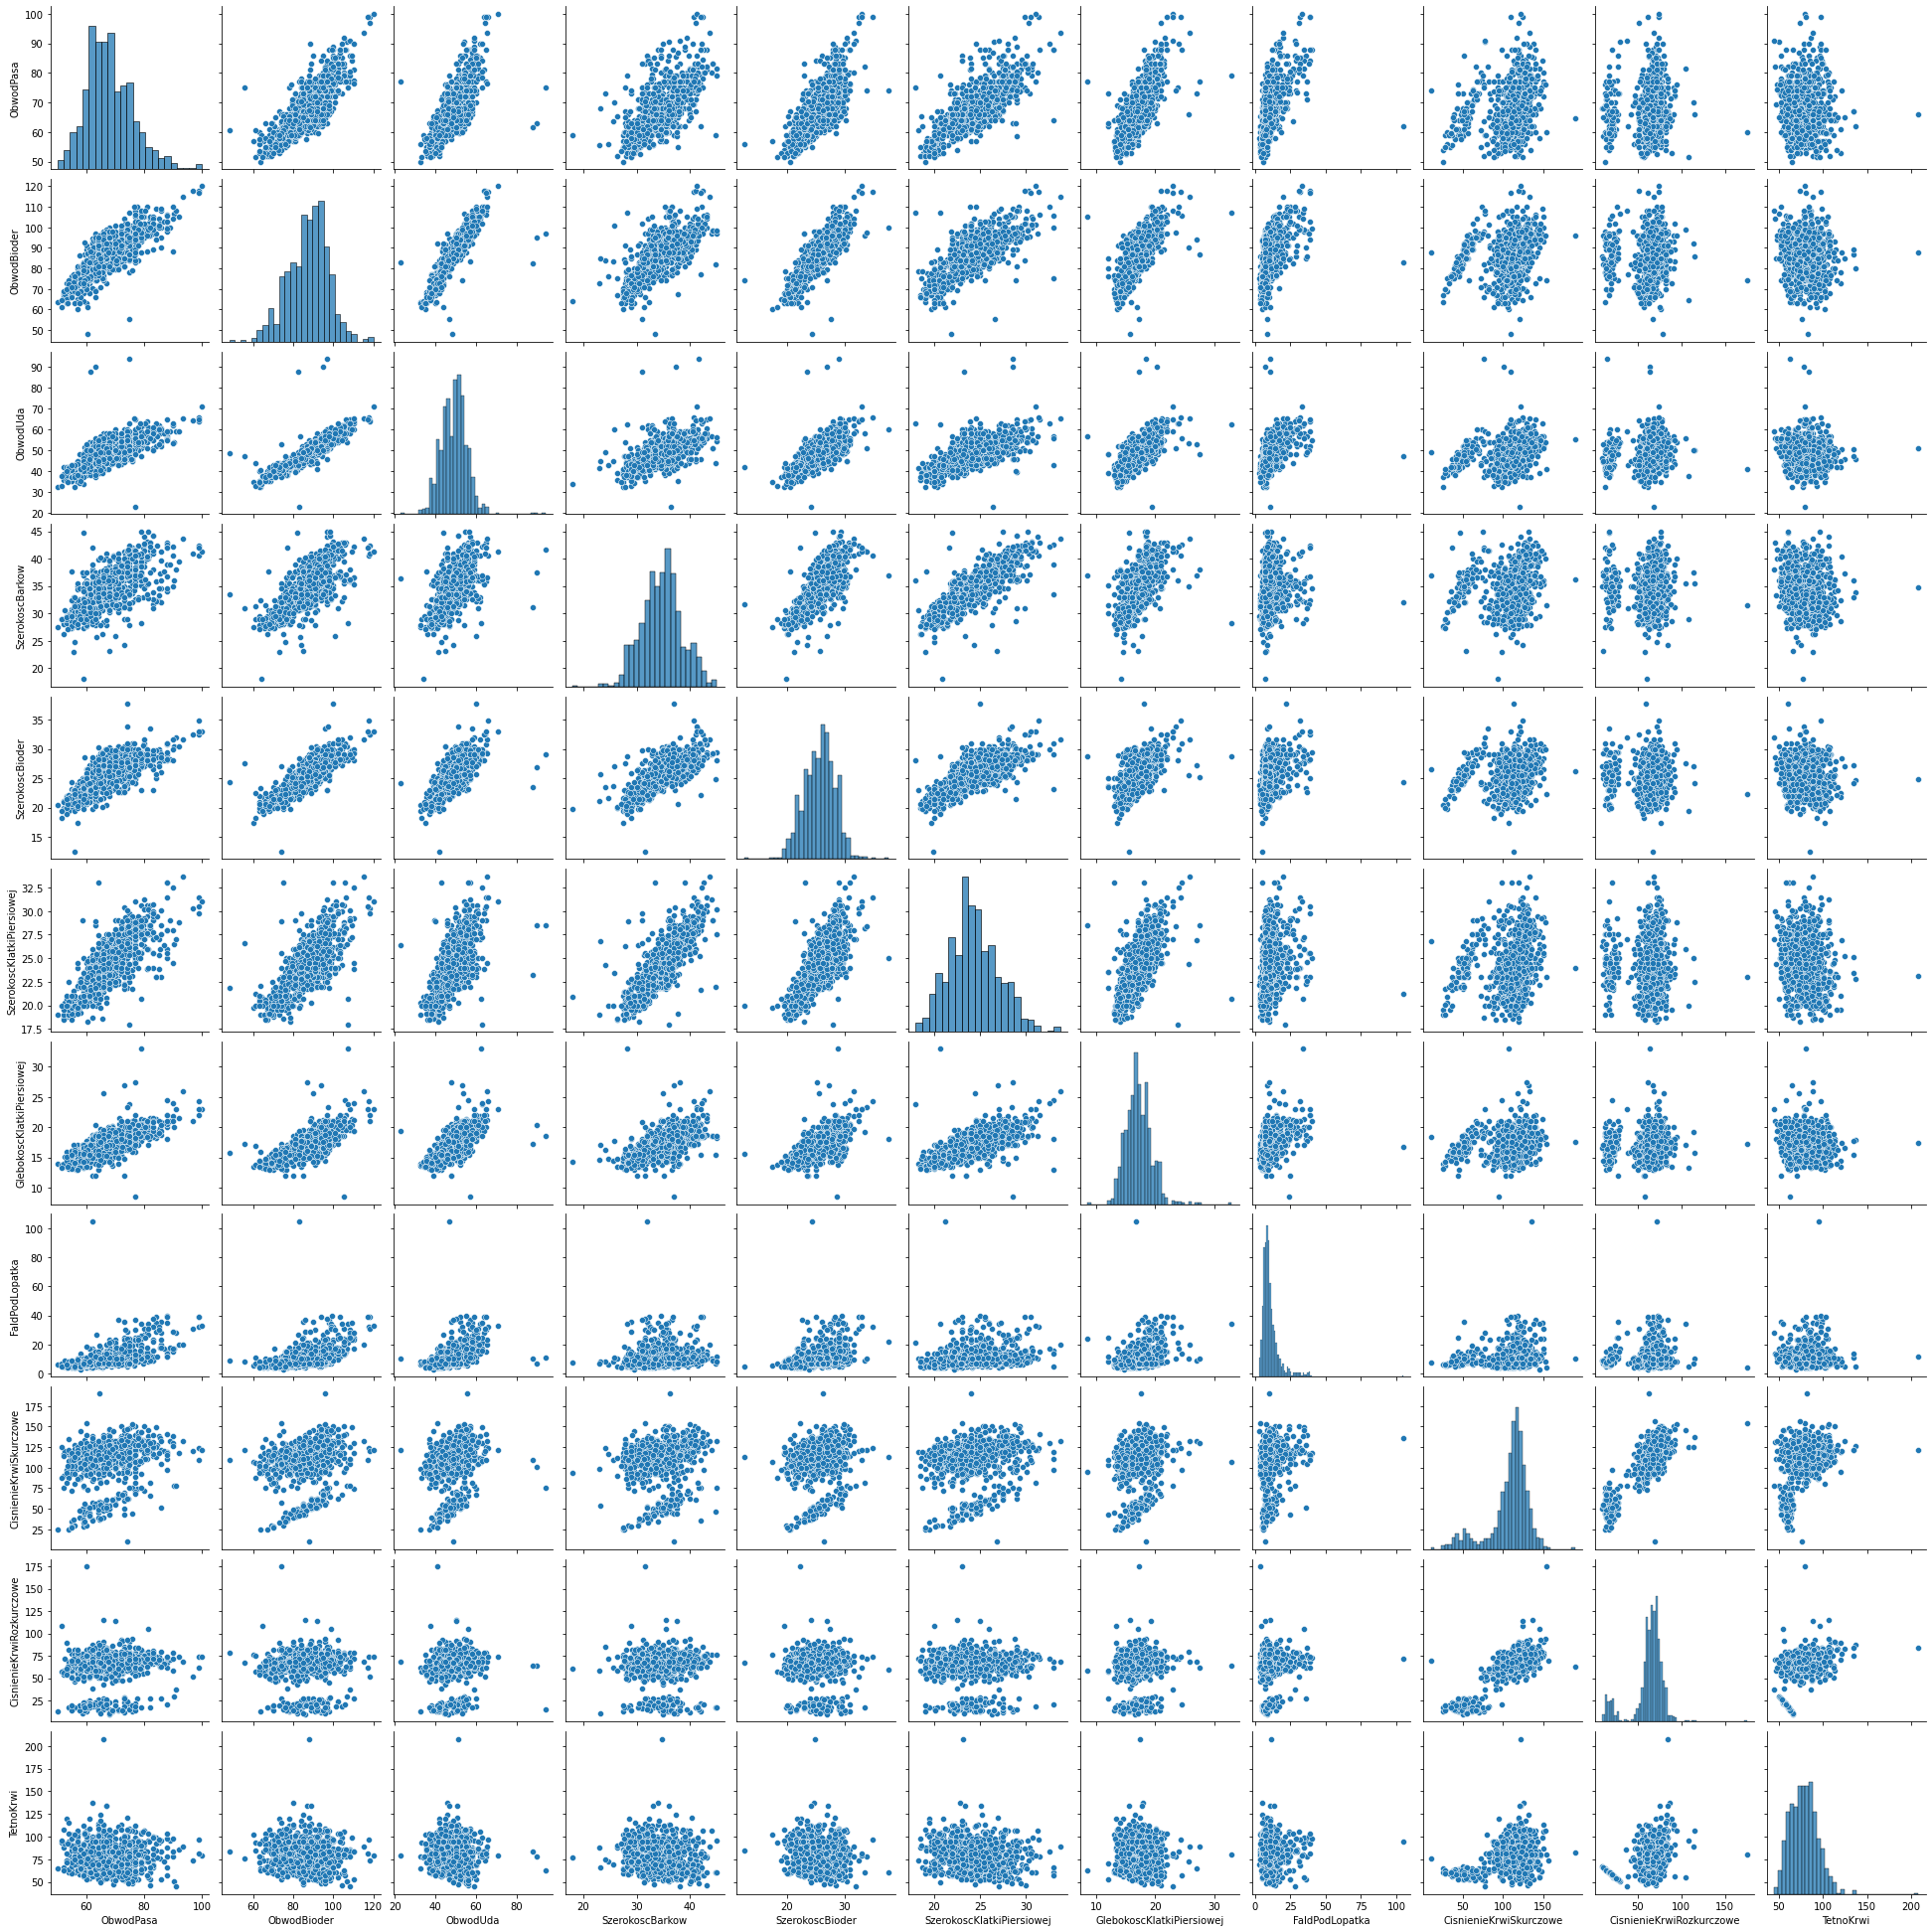

In [58]:
odst = [8,9,10,12,13,14,15,17,19,20,21]
sns.pairplot(antropo[antropo.columns[odst]])

In [59]:
#gg = 3*antropo["TetnoKrwi"].quantile(0.99)
#gd = 0.3*antropo["TetnoKrwi"].quantile(0.01)
#antropo.loc[antropo["TetnoKrwi"]>gg, "TetnoKrwi"] = gg
#antropo.loc[antropo["TetnoKrwi"]<gd, "TetnoKrwi"] = gd
#print(gg)
#print(gd)

ObwodPasa: gg: 270.12000000000006 gd: 15.899999999999999
ObwodBioder: gg: 330.0 gd: 18.9
ObwodUda: gg: 195.0 gd: 10.65
SzerokoscBarkow: gg: 129.0 gd: 8.1108
SzerokoscBioder: gg: 95.17200000000003 gd: 5.909999999999999
SzerokoscKlatkiPiersiowej: gg: 93.0 gd: 5.7
GlebokoscKlatkiPiersiowej: gg: 70.29600000000005 gd: 3.9599999999999995
FaldPodLopatka: gg: 108.24000000000012 gd: 1.2
CisnienieKrwiSkurczowe: gg: 446.19000000000005 gd: 9.9972
CisnienieKrwiRozkurczowe: gg: 275.25 gd: 3.9
TetnoKrwi: gg: 350.39999999999986 gd: 15.491999999999999


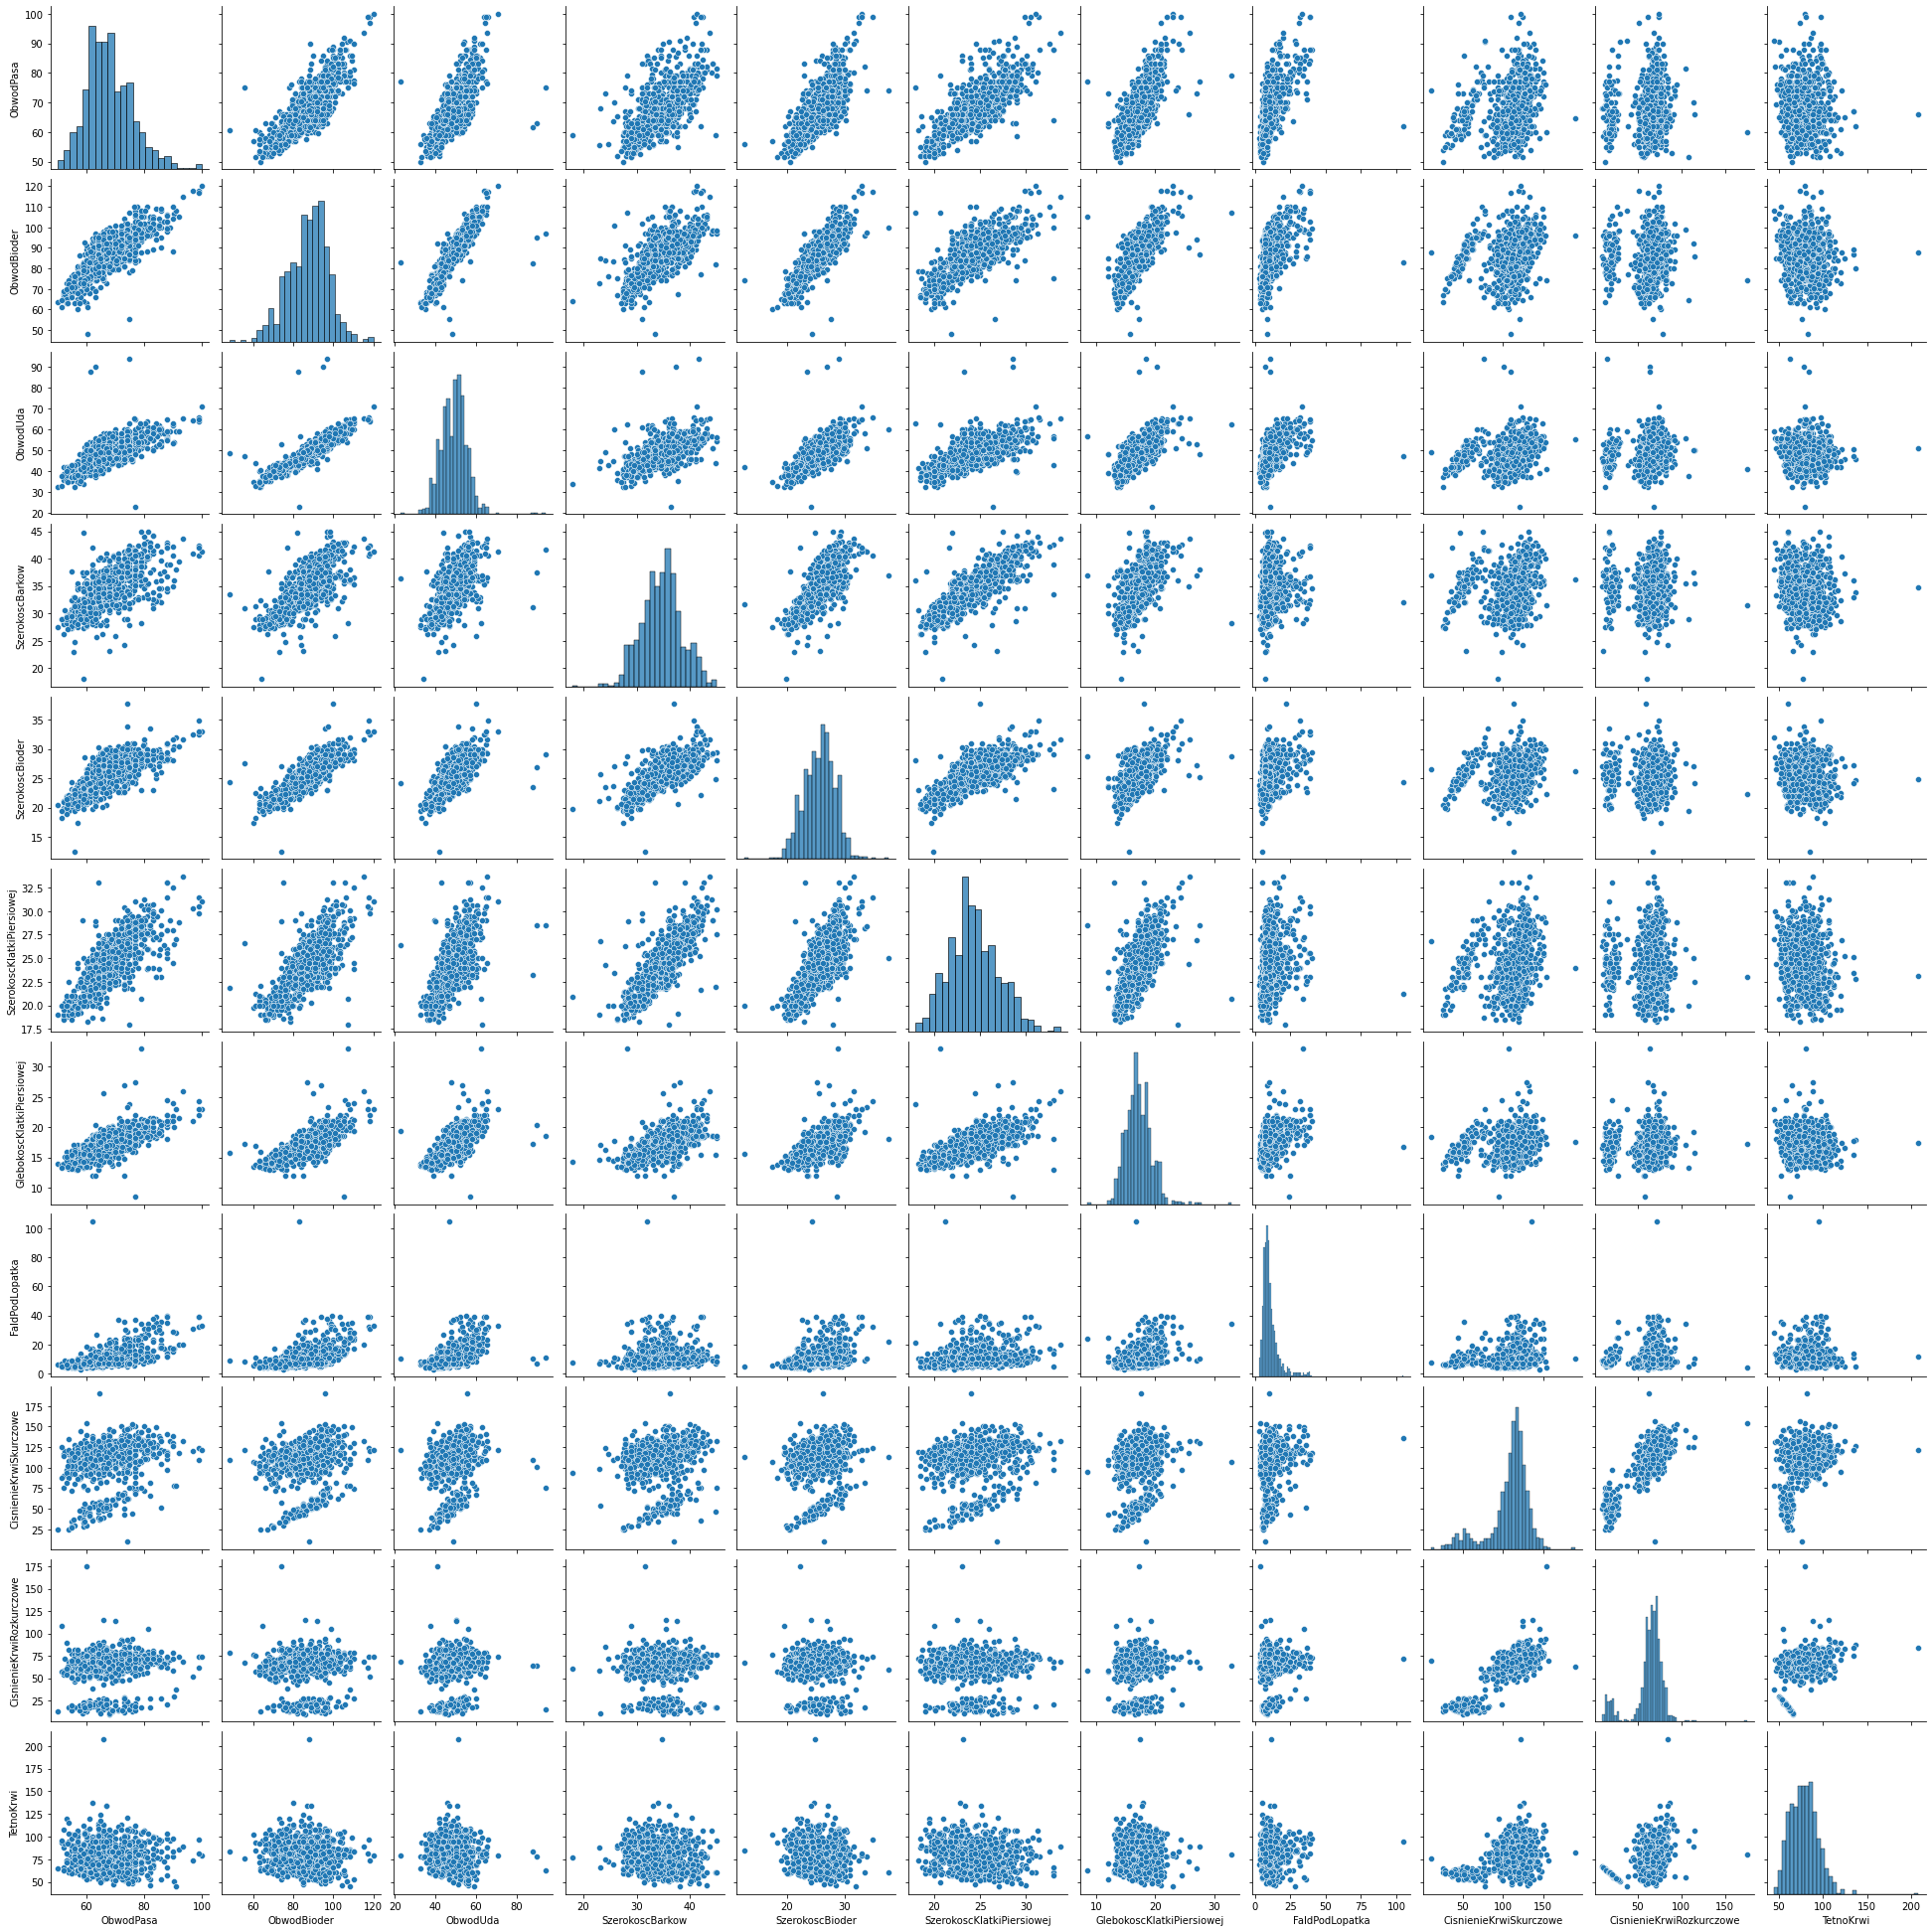

In [60]:
a = 0.06
for c in antropo.columns[odst]:
    gg = 3*antropo[c].quantile(0.99)
    gd = 0.3*antropo[c].quantile(0.01)
    antropo.loc[antropo[c]>gg, c] = np.nan
    antropo.loc[antropo[c]<gd, c] = np.nan
    print(f"{c}: gg: {gg} gd: {gd}")
    #print(antropo[c].describe())
sns.pairplot(antropo[antropo.columns[odst]])

In [61]:
antropo.to_csv("antropo_out.csv", sep=";")